In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Defining the parameters
batch_size = 32
num_classes = 10
epochs = 50

In [5]:
# Splitting the data between train and test
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(y_train.shape)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
(50000, 1)


In [6]:
print(y_train.shape[0])

50000


[   29    30    35 ... 49941 49992 49994]
[[[[202 204 199]
   [202 204 199]
   [204 206 201]
   ...
   [207 208 200]
   [205 206 199]
   [203 204 198]]

  [[206 208 203]
   [206 208 203]
   [207 209 204]
   ...
   [210 211 205]
   [208 209 203]
   [206 207 201]]

  [[210 212 207]
   [211 213 208]
   [212 214 210]
   ...
   [214 214 210]
   [212 213 208]
   [210 211 206]]

  ...

  [[218 217 222]
   [210 209 214]
   [194 194 198]
   ...
   [243 242 247]
   [244 242 247]
   [243 243 247]]

  [[219 218 223]
   [217 216 221]
   [216 216 220]
   ...
   [241 240 245]
   [241 240 245]
   [241 240 245]]

  [[217 216 221]
   [216 215 220]
   [217 216 221]
   ...
   [239 238 243]
   [239 238 243]
   [240 238 243]]]


 [[[126 118 110]
   [122 115 108]
   [126 119 111]
   ...
   [124 118 106]
   [120 114 102]
   [117 111  99]]

  [[122 115 107]
   [119 112 104]
   [121 114 106]
   ...
   [124 118 106]
   [122 116 104]
   [117 111  99]]

  [[122 115 107]
   [121 114 106]
   [121 114 106]
   ...
   

   [137 114  95]]]]
[   27    40    51 ... 49964 49980 49988]
[[[[ 45  20  19]
   [ 42  21  18]
   [ 35  17  13]
   ...
   [ 93  86  81]
   [ 51  47  42]
   [ 39  36  32]]

  [[ 46  22  20]
   [ 42  22  18]
   [ 40  22  18]
   ...
   [105  93  92]
   [ 66  53  52]
   [ 48  39  36]]

  [[ 43  22  19]
   [ 40  21  17]
   [ 48  32  27]
   ...
   [ 88  74  77]
   [ 77  59  60]
   [ 58  44  43]]

  ...

  [[ 55  54  51]
   [ 67  57  54]
   [ 73  64  57]
   ...
   [ 93  87  49]
   [101 116  34]
   [103 123  30]]

  [[ 55  54  51]
   [ 62  53  50]
   [ 68  59  52]
   ...
   [ 69  62  38]
   [ 81  93  29]
   [ 99 117  35]]

  [[ 58  53  51]
   [ 59  46  44]
   [ 58  45  40]
   ...
   [ 77  68  53]
   [ 66  75  29]
   [ 83  99  31]]]


 [[[101 114  35]
   [ 94 116  48]
   [ 98 112  42]
   ...
   [121 119  58]
   [127 130  66]
   [143 136  90]]

  [[120 122  64]
   [131 132  98]
   [124 119  74]
   ...
   [115 116  53]
   [121 126  63]
   [144 141  77]]

  [[120 126  50]
   [139 140  82]
   [140

[    1     2    14 ... 49963 49971 49997]
[[[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69  55]]

  ...

  [[175 167 166]
   [156 154 160]
   [154 160 170]
   ...
   [ 42  34  36]
   [ 61  53  57]
   [ 93  83  91]]

  [[165 154 128]
   [156 152 130]
   [159 161 142]
   ...
   [103  93  96]
   [123 114 120]
   [131 121 131]]

  [[163 148 120]
   [158 148 122]
   [163 156 133]
   ...
   [143 133 139]
   [143 134 142]
   [143 133 144]]]


 [[[255 255 255]
   [253 253 253]
   [253 253 253]
   ...
   [253 253 253]
   [253 253 253]
   [253 253 253]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [254 254 254]
   [254 254 254]
   ...
   

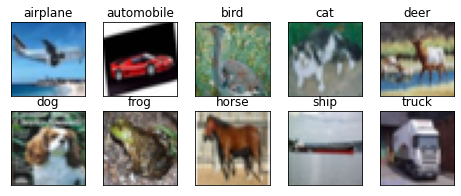

In [9]:
# plotting some random 10 images

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    print(idx)
    features_idx = x_train[idx,::]
    print(features_idx)
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [ ]:
# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# Printing sample data
print(y_train[:10])

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
# summary of the model
print(model.summary())

In [ ]:
# compile
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255


In [ ]:
# Training the model
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

In [ ]:
# Model training done
print('Model training done')